The purpose of the File is to perform below steps on the Profile data
<li>POS Tagging Analysis
         <ul>
             <li> Identify the POS of interest
             <li> Chunking for phrases rdf triplets similar use
             <li> NE Dictionary for NER
             <li> Are there any patterns associated with their use, lexical grammatical?
         </ul>

In [2]:
#Generic Libraries
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np 
import pickle

#Visualization Libraries
import matplotlib.pyplot as plt 
import seaborn as sns
from wordcloud import WordCloud
sns.set()


#NLP Libraries
import nltk


#This needs to be executed only once
# nltk.download('tagsets')

In [3]:
#Load the data created and saved at the end of BioSkillsPreprocessing&EDA file and print the file info
df = pd.read_csv(r'data\df_processed_bio.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1057 entries, 0 to 1056
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   bio                 1057 non-null   object
 1   word_tokenized      1057 non-null   object
 2   sentence_tokenized  1057 non-null   object
 3   word_count          1057 non-null   int64 
 4   sentence_count      1057 non-null   int64 
 5   clean_words         1057 non-null   object
 6   clean_stemmed       1057 non-null   object
 7   clean_lemmed        1057 non-null   object
dtypes: int64(2), object(6)
memory usage: 66.2+ KB


In [4]:
# duplicates reduce the df by 651 observations
df.drop_duplicates(inplace = True)
df.shape

(1053, 8)

In [5]:
df.head()

,bio,word_tokenized,sentence_tokenized,word_count,sentence_count,clean_words,clean_stemmed,clean_lemmed
0,ratul arora is from delhi. he has blindness. h...,"['ratul', 'arora', 'is', 'from', 'delhi', 'he'...","['ratul arora is from delhi.', 'he has blindne...",105,9,"['ratul', 'arora', 'delhi', 'blindness', 'hold...","['ratul', 'arora', 'delhi', 'blind', 'hold', '...","['ratul', 'arora', 'delhi', 'blindness', 'hold..."
1,"aman verma is from nalasopara, maharashtra. he...","['aman', 'verma', 'is', 'from', 'nalasopara', ...","['aman verma is from nalasopara, maharashtra.'...",100,7,"['aman', 'verma', 'nalasopara', 'maharashtra',...","['aman', 'verma', 'nalasopara', 'maharashtra',...","['aman', 'verma', 'nalasopara', 'maharashtra',..."
2,"sampa gupta is from mumbai, maharashtra. she h...","['sampa', 'gupta', 'is', 'from', 'mumbai', 'ma...","['sampa gupta is from mumbai, maharashtra.', '...",84,6,"['sampa', 'gupta', 'mumbai', 'maharashtra', 'b...","['sampa', 'gupta', 'mumbai', 'maharashtra', 'b...","['sampa', 'gupta', 'mumbai', 'maharashtra', 'b..."
3,monu varma is a 29-year-old visually impaired ...,"['monu', 'varma', 'is', 'a', '29', 'year', 'ol...",['monu varma is a 29-year-old visually impaire...,89,5,"['monu', 'varma', '29', 'year', 'old', 'visual...","['monu', 'varma', '29', 'year', 'old', 'visual...","['monu', 'varma', '29', 'year', 'old', 'visual..."
4,jayant singh raghav believes that the position...,"['jayant', 'singh', 'raghav', 'believes', 'tha...",['jayant singh raghav believes that the positi...,214,12,"['jayant', 'singh', 'raghav', 'believes', 'pos...","['jayant', 'singh', 'raghav', 'believ', 'posit...","['jayant', 'singh', 'raghav', 'belief', 'posit..."


# Parts of Speech Tagging (POS)

In [6]:
def pos_series(keyword):
    '''categorizes parts of speech after tokenizing words with POS tags'''
    tokens = nltk.word_tokenize(keyword)
    tagged = nltk.pos_tag(tokens)
    return tagged

In [7]:
# cell runs slower due to computational exhaustion
pos_tagged_arrs = df.bio.apply(pos_series)

In [8]:
# unloads the tuples from the tree object for easier manipulation
pos_tagged = []
for row in pos_tagged_arrs.values:
    for element in row:
        pos_tagged.append(element)

In [9]:
# dataframe contains all of the words with their corresponding pos tag;
pos_df = pd.DataFrame(pos_tagged, columns = ('word','POS'))
# special chars were removed due to irrelevance as a tag but will be included in regex
char_removal = [',', '.', ':', '#', '$', '\'\'', '``', '(', ')','@']
drop_indices = (pos_df.loc[pos_df.POS.isin(char_removal)].index)
pos_df.drop(drop_indices, inplace = True)

In [10]:
# frequency of the unique pos tags within the dataset
pos_sum = pos_df.groupby('POS').count() # group by POS tags
pos_sum.sort_values(['word'], ascending=[False]).head(10) # in descending order of number of words per tag


,word
POS,
NN,24841
IN,11693
JJ,9504
NNS,6393
DT,6127
VBZ,5718
PRP,5253
CC,4455
RB,2886


In [11]:
# takes a random sample and shows structure of array along with how each is tagged
sample = df.bio.sample(5)
samples = []
for doc in sample:
    tokens = nltk.word_tokenize(doc)
    samples.append(nltk.pos_tag(tokens))
    
samples[2]

[('dr.', 'NN'),
 ('kabeers', 'NNS'),
 ('academic', 'JJ'),
 ('background', 'NN'),
 ('is', 'VBZ'),
 ('bba', 'JJ'),
 (',', ','),
 ('mba', 'NN'),
 (',', ','),
 ('m.phil', 'NN'),
 (',', ','),
 ('and', 'CC'),
 ('ph.d.', 'NN'),
 ('in', 'IN'),
 ('a', 'DT'),
 ('reputed', 'JJ'),
 ('central', 'JJ'),
 ('university', 'NN'),
 ('with', 'IN'),
 ('22', 'CD'),
 ('years', 'NNS'),
 ('of', 'IN'),
 ('managerial', 'JJ'),
 ('plus', 'CC'),
 ('18', 'CD'),
 ('months', 'NNS'),
 ('teaching', 'VBG'),
 ('&', 'CC'),
 ('head', 'NN'),
 ('of', 'IN'),
 ('the', 'DT'),
 ('dept', 'JJ'),
 ('experience', 'NN'),
 ('.', '.'),
 ('tcs', 'NN'),
 ('computer', 'NN'),
 ('training', 'NN'),
 ('for', 'IN'),
 ('persons', 'NNS'),
 ('with', 'IN'),
 ('visual', 'JJ'),
 ('impairment', 'NN'),
 ('enables', 'VBZ'),
 ('him', 'PRP'),
 ('to', 'TO'),
 ('work', 'VB'),
 ('on', 'IN'),
 ('computers', 'NNS'),
 ('as', 'RB'),
 ('well', 'RB'),
 ('as', 'IN'),
 ('any', 'DT'),
 ('other', 'JJ'),
 ('professors', 'NNS'),
 ('.', '.'),
 ('with', 'IN'),
 ('a', 'DT')

# Analyses of POS


In [12]:
# print out of the pos tags for easy reference
for tag in pos_df.POS.unique():
    print(nltk.help.upenn_tagset(tag))

NN: noun, common, singular or mass
    common-carrier cabbage knuckle-duster Casino afghan shed thermostat
    investment slide humour falloff slick wind hyena override subhumanity
    machinist ...
None
VBZ: verb, present tense, 3rd person singular
    bases reconstructs marks mixes displeases seals carps weaves snatches
    slumps stretches authorizes smolders pictures emerges stockpiles
    seduces fizzes uses bolsters slaps speaks pleads ...
None
IN: preposition or conjunction, subordinating
    astride among uppon whether out inside pro despite on by throughout
    below within for towards near behind atop around if like until below
    next into if beside ...
None
PRP: pronoun, personal
    hers herself him himself hisself it itself me myself one oneself ours
    ourselves ownself self she thee theirs them themselves they thou thy us
None
DT: determiner
    all an another any both del each either every half la many much nary
    neither no some such that the them these this those

In [13]:
# sandbox cell
pos_tagged_arrs[578]

[('kkhush', 'NN'),
 ('trivedi', 'NN'),
 ('is', 'VBZ'),
 ('an', 'DT'),
 ('aspiring', 'JJ'),
 ('singer', 'NN'),
 ('and', 'CC'),
 ('model', 'NN'),
 ('from', 'IN'),
 ('delhi', 'JJ'),
 ('ncr', 'NN'),
 ('.', '.'),
 ('he', 'PRP'),
 ('is', 'VBZ'),
 ('a', 'DT'),
 ('fun', 'NN'),
 ('loving', 'NN'),
 (',', ','),
 ('melodious', 'JJ'),
 ('voiced', 'VBD'),
 ('handsome', 'JJ'),
 ('boy', 'NN'),
 ('.', '.'),
 ('kkhush', 'NN'),
 ('is', 'VBZ'),
 ('a', 'DT'),
 ('source', 'NN'),
 ('of', 'IN'),
 ('inspiration', 'NN'),
 ('for', 'IN'),
 ('people', 'NNS'),
 ('around', 'IN'),
 ('him', 'PRP'),
 ('to', 'TO'),
 ('live', 'VB'),
 ('life', 'NN'),
 ('happily', 'RB'),
 ('and', 'CC'),
 ('bring', 'VB'),
 ('happiness', 'NN'),
 ('around', 'IN'),
 ('their', 'PRP$'),
 ('surrounding', 'NN'),
 ('.', '.'),
 ('he', 'PRP'),
 ('is', 'VBZ'),
 ('having', 'VBG'),
 ('social', 'JJ'),
 ('skills', 'NNS'),
 ('disability', 'NN'),
 ('.', '.')]

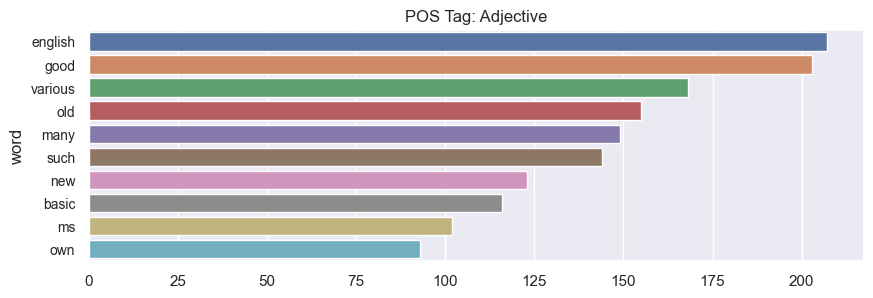

In [14]:
# adjectives
jj_tag = pos_df.loc[pos_df.POS == 'JJ'].groupby('word').count().POS.nlargest(10)
sns.set(rc={'figure.figsize':(10,3)})
jjbar = sns.barplot(y = jj_tag.index, x = jj_tag.values, orient = 'h')
plt.title('POS Tag: Adjective')
jjbar.set_yticklabels(jjbar.get_yticklabels(), fontsize = 10);

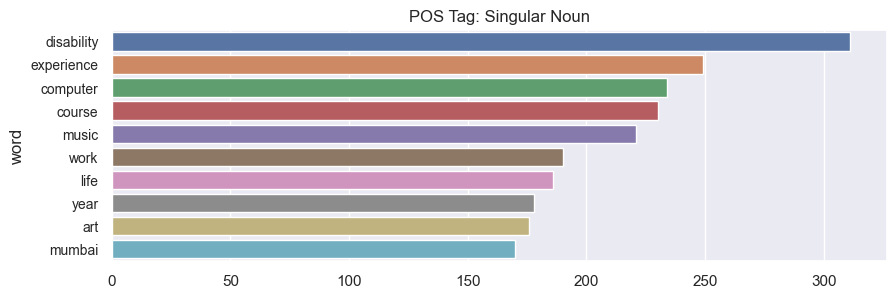

In [15]:
# nouns singular
nn_tag = pos_df.loc[pos_df.POS == 'NN'].groupby('word').count().POS.nlargest(10)
sns.set(rc={'figure.figsize':(10,3)})
nnbar = sns.barplot(y = nn_tag.index, x = nn_tag.values, orient = 'h')
plt.title('POS Tag: Singular Noun')
nnbar.set_yticklabels(nnbar.get_yticklabels(), fontsize = 10);

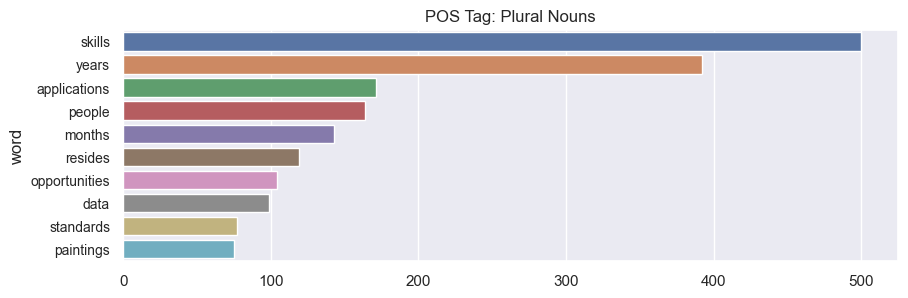

In [16]:
# nouns plural
NNS_tag = pos_df.loc[pos_df.POS == 'NNS'].groupby('word').count().POS.nlargest(10)
sns.set(rc={'figure.figsize':(10,3)})
NNSbar = sns.barplot(y = NNS_tag.index, x = NNS_tag.values, orient = 'h')
plt.title('POS Tag: Plural Nouns')
NNSbar.set_yticklabels(NNSbar.get_yticklabels(), fontsize = 10);

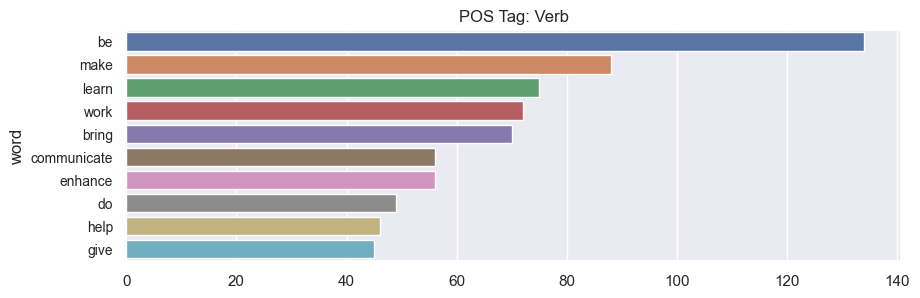

In [17]:
# verb base form 
VB_tag = pos_df.loc[pos_df.POS == 'VB'].groupby('word').count().POS.nlargest(10)
sns.set(rc={'figure.figsize':(10,3)})
VBbar = sns.barplot(y = VB_tag.index, x = VB_tag.values, orient = 'h')
plt.title('POS Tag: Verb')
VBbar.set_yticklabels(VBbar.get_yticklabels(), fontsize = 10);

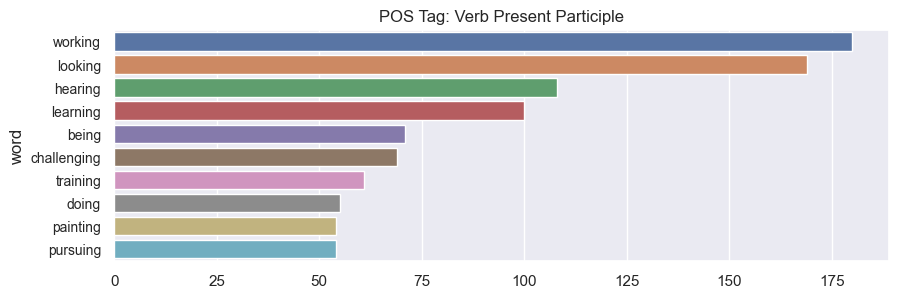

In [18]:
# Verb, present participle
VBG_tag = pos_df.loc[pos_df.POS == 'VBG'].groupby('word').count().POS.nlargest(10)
sns.set(rc={'figure.figsize':(10,3)})
VBGbar = sns.barplot(y = VBG_tag.index, x = VBG_tag.values, orient = 'h')
plt.title('POS Tag: Verb Present Participle')
VBGbar.set_yticklabels(VBGbar.get_yticklabels(), fontsize = 10);

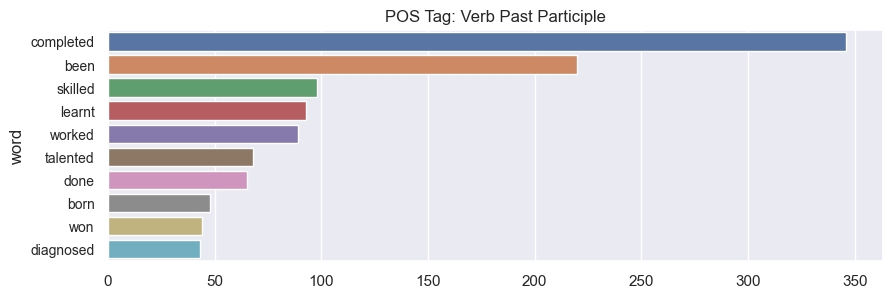

In [19]:
# Verb, past participle
VBN_tag = pos_df.loc[pos_df.POS == 'VBN'].groupby('word').count().POS.nlargest(10)
sns.set(rc={'figure.figsize':(10,3)})
VBNbar = sns.barplot(y = VBN_tag.index, x = VBN_tag.values, orient = 'h')
plt.title('POS Tag: Verb Past Participle')
VBNbar.set_yticklabels(VBNbar.get_yticklabels(), fontsize = 10);

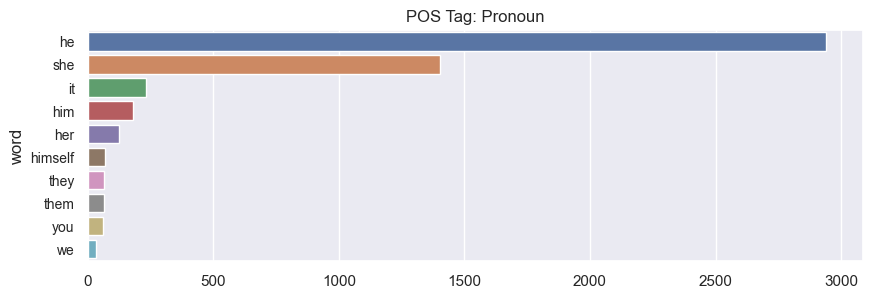

In [20]:
# Personal pronoun
PRP_tag = pos_df.loc[pos_df.POS == 'PRP'].groupby('word').count().POS.nlargest(10)
sns.set(rc={'figure.figsize':(10,3)})
PRPbar = sns.barplot(y = PRP_tag.index, x = PRP_tag.values, orient = 'h')
plt.title('POS Tag: Pronoun')
PRPbar.set_yticklabels(PRPbar.get_yticklabels(), fontsize = 10);

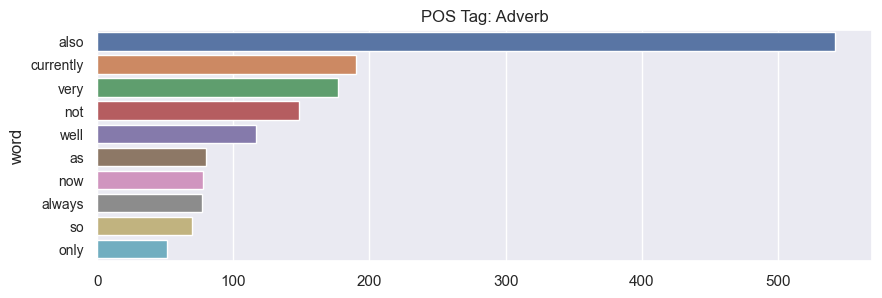

In [21]:
# adverb
RB_tag = pos_df.loc[pos_df.POS == 'RB'].groupby('word').count().POS.nlargest(10)
sns.set(rc={'figure.figsize':(10,3)})
RBbar = sns.barplot(y = RB_tag.index, x = RB_tag.values, orient = 'h')
plt.title('POS Tag: Adverb')
RBbar.set_yticklabels(RBbar.get_yticklabels(), fontsize = 10);

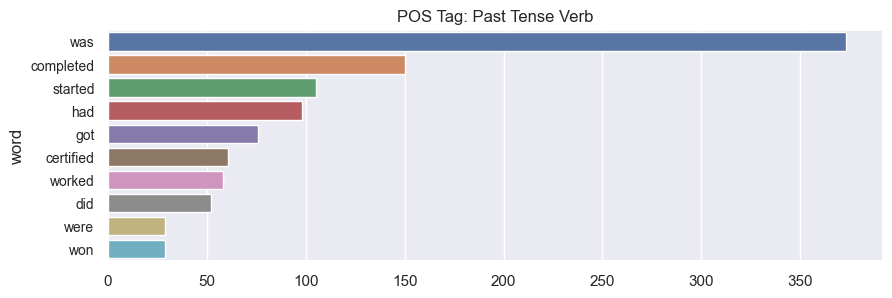

In [22]:
# Verb, past tense
VBD_tag = pos_df.loc[pos_df.POS == 'VBD'].groupby('word').count().POS.nlargest(10)
sns.set(rc={'figure.figsize':(10,3)})
VBDbar = sns.barplot(y = VBD_tag.index, x = VBD_tag.values, orient = 'h')
plt.title('POS Tag: Past Tense Verb')
VBDbar.set_yticklabels(VBDbar.get_yticklabels(), fontsize = 10);

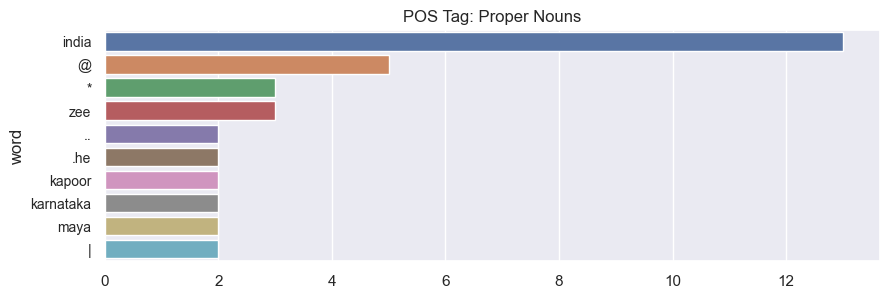

In [23]:
# Proper noun, singular
NNP_tag = pos_df.loc[pos_df.POS == 'NNP'].groupby('word').count().POS.nlargest(10)
sns.set(rc={'figure.figsize':(10,3)})
NNPbar = sns.barplot(y = NNP_tag.index, x = NNP_tag.values, orient = 'h')
plt.title('POS Tag: Proper Nouns')
NNPbar.set_yticklabels(NNPbar.get_yticklabels(), fontsize = 10);

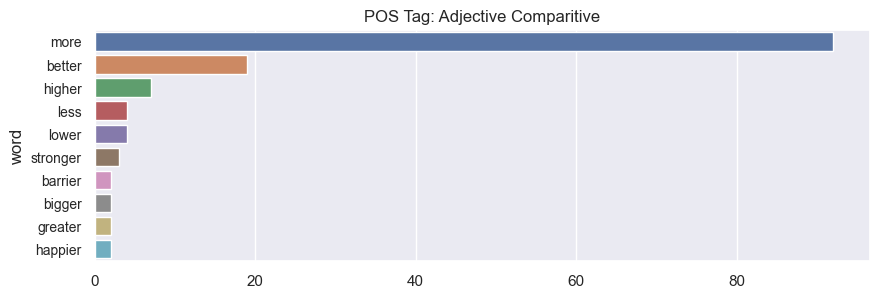

In [24]:
# 	Adjective, comparative
JJR_tag = pos_df.loc[pos_df.POS == 'JJR'].groupby('word').count().POS.nlargest(10)
sns.set(rc={'figure.figsize':(10,3)})
JJRbar = sns.barplot(y = JJR_tag.index, x = JJR_tag.values, orient = 'h')
plt.title('POS Tag: Adjective Comparitive')
JJRbar.set_yticklabels(JJRbar.get_yticklabels(), fontsize = 10);

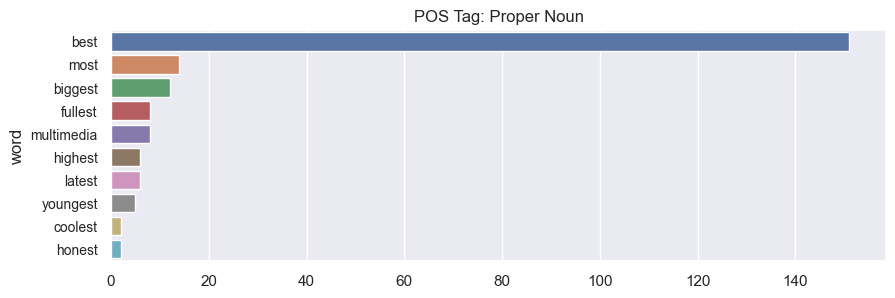

In [25]:
# Proper noun, singular
NNP_tag = pos_df.loc[pos_df.POS == 'JJS'].groupby('word').count().POS.nlargest(10)
sns.set(rc={'figure.figsize':(10,3)})
NNPbar = sns.barplot(y = NNP_tag.index, x = NNP_tag.values, orient = 'h')
plt.title('POS Tag: Proper Noun')
NNPbar.set_yticklabels(NNPbar.get_yticklabels(), fontsize = 10);